# Comparison of Numerical Integration Methods

approximate intergral of a smooth function interpolated on uneven data points 

0.4388245731174757 0.4388520686552254 0.4388521112875932 0.43809043067659326


/var/folders/7h/m_gp7w0x1955xv6xvcndpkf40000gn/T/ipykernel_5348/1410809926.py:32: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  spline_simpson = simps(y_spline, x_spline)


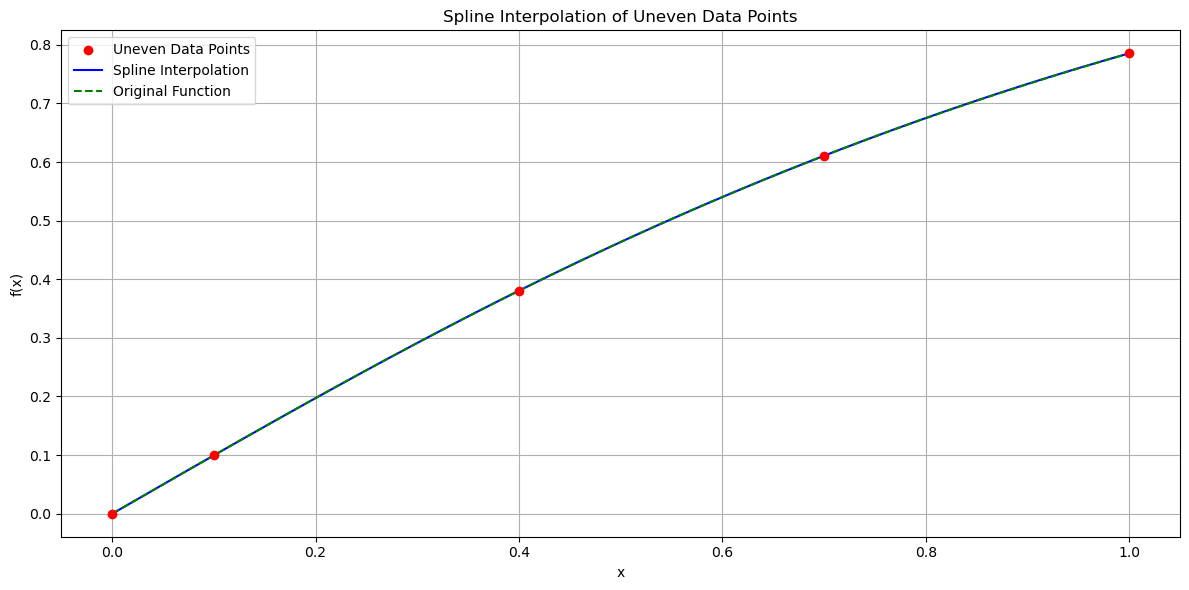

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import trapezoid, simps, quad

# Define the function
def arctan_func(x):
    return np.arctan(x)

# Integration bounds
a, b = 0, 1

# Generate unevenly spaced data points
x_uneven = np.array([0, 0.1, 0.4, 0.7, 1.0])
y_uneven = arctan_func(x_uneven)

# Spline interpolation
spline_func = CubicSpline(x_uneven, y_uneven)
x_spline = np.linspace(a, b, 1000)
y_spline = spline_func(x_spline)

# Original function for reference
x_dense = np.linspace(a, b, 1000)
y_dense = arctan_func(x_dense)

# Integration using numerical methods
# Exact integral
exact_integral, _ = quad(arctan_func, a, b)

# Numerical methods on spline-interpolated function
spline_trapz = trapezoid(y_spline, x_spline)
spline_simpson = simps(y_spline, x_spline)

# Gaussian Quadrature (2-point)
gauss_points = np.array([-1/np.sqrt(3), 1/np.sqrt(3)])
gauss_weights = np.array([1, 1])
gauss_x_spline = (b - a) / 2 * gauss_points + (b + a) / 2
gauss_spline_result = (b - a) / 2 * np.sum(gauss_weights * spline_func(gauss_x_spline))

# Results
methods = ["Exact (quad)", "Trapezoidal Rule", "Simpson's Rule", "Gaussian Quadrature"]
approximations = [exact_integral, spline_trapz, spline_simpson, gauss_spline_result]
print(exact_integral, spline_trapz, spline_simpson, gauss_spline_result)

# Plot the original uneven data points and spline interpolation
plt.figure(figsize=(12, 6))
plt.scatter(x_uneven, y_uneven, color='red', label='Uneven Data Points', zorder=5)
plt.plot(x_spline, y_spline, color='blue', label='Spline Interpolation')
plt.plot(x_dense, y_dense, color='green', linestyle='--', label='Original Function')
plt.title("Spline Interpolation of Uneven Data Points")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

numerically integrate the exact arctan function

In [7]:
import numpy as np
from scipy.integrate import quad, trapezoid, simps

# Define the function
def arctan_func(x):
    return np.arctan(x)

# Integration bounds
a, b = 0, 1

# Exact integral using quad
exact_integral, _ = quad(arctan_func, a, b)

# Trapezoidal Rule
x_trapz = np.linspace(a, b, 1000)  # Uniformly spaced points
y_trapz = arctan_func(x_trapz)
trapz_result = trapezoid(y_trapz, x_trapz)

# Simpson's Rule
simpson_result = simps(y_trapz, x_trapz)

# Gaussian Quadrature (2-point rule)
gauss_points = np.array([-1/np.sqrt(3), 1/np.sqrt(3)])
gauss_weights = np.array([1, 1])
gauss_x = (b - a) / 2 * gauss_points + (b + a) / 2
gauss_result = (b - a) / 2 * np.sum(gauss_weights * arctan_func(gauss_x))

# Print the results
print("Results for integrating arctan(x) between 0 and 1:")
print(f"Exact (quad): {exact_integral}")
print(f"Trapezoidal Rule: {trapz_result}")
print(f"Simpson's Rule: {simpson_result}")
print(f"Gaussian Quadrature: {gauss_result}")
# print(f"Gaussian Quadrature: {gauss_result:.6f}")

Results for integrating arctan(x) between 0 and 1:
Exact (quad): 0.4388245731174757
Trapezoidal Rule: 0.438824531367347
Simpson's Rule: 0.4388245731175105
Gaussian Quadrature: 0.4380290252990967


/var/folders/7h/m_gp7w0x1955xv6xvcndpkf40000gn/T/ipykernel_5348/2680984300.py:20: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  simpson_result = simps(y_trapz, x_trapz)


In [11]:
print(0.438824531367347 - 0.4388520686552254)
print(0.4388245731175105 - 0.4388521112875932)
print(0.4380290252990967 - 0.43809043067659326)



-2.75372878784097e-05
-2.7538170082719304e-05
-6.14053774965484e-05


numerically integrate the unevenly spaced data points direclty 

In [13]:
import numpy as np
from scipy.integrate import simps, trapezoid

# Uneven data points
x_uneven = np.array([0, 0.1, 0.4, 0.7, 1.0])
y_uneven = np.arctan(x_uneven)

# Trapezoidal Rule
trapz_result_uneven = trapezoid(y_uneven, x_uneven)

# Simpson's Rule
try:
    simpson_result_uneven = simps(y_uneven, x_uneven)
except ValueError as e:
    simpson_result_uneven = f"Simpson's Rule requires evenly spaced data: {e}"

# Gaussian Quadrature cannot directly apply to discrete data points.
gauss_result_uneven = "Gaussian Quadrature is not applicable directly to discrete points."

# Print the results
print("Numerical Integration on Uneven Data Points (Direct):")
print(f"Trapezoidal Rule: {trapz_result_uneven:.6f}")
print(f"Simpson's Rule: {simpson_result_uneven}")
print(f"Gaussian Quadrature: {gauss_result_uneven}")

Numerical Integration on Uneven Data Points (Direct):
Trapezoidal Rule: 0.435113
Simpson's Rule: 0.4385970692604518
Gaussian Quadrature: Gaussian Quadrature is not applicable directly to discrete points.


/var/folders/7h/m_gp7w0x1955xv6xvcndpkf40000gn/T/ipykernel_5348/1645211868.py:13: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  simpson_result_uneven = simps(y_uneven, x_uneven)


In [14]:
print(0.438824531367347 - 0.435113)
print(0.4388245731175105 - 0.4385970692604518)
print(0.4380290252990967 - 0.43809043067659326)

0.0037115313673469763
0.00022750385705871956
-6.14053774965484e-05


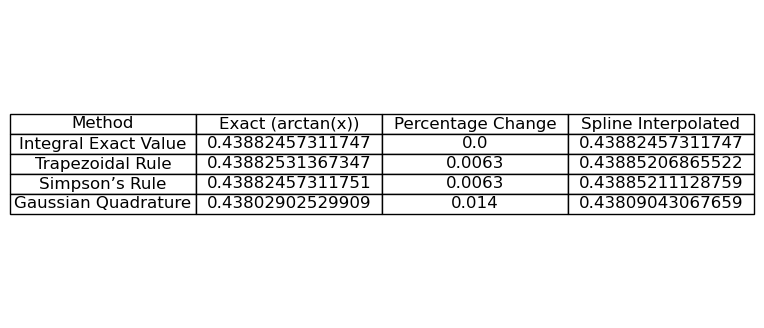

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Results data
data = {
    'Method': ['Integral Exact Value', 'Trapezoidal Rule', 'Simpson’s Rule', 'Gaussian Quadrature'],
    'Exact (arctan(x))': [0.43882457311747, 0.43882531367347, 0.43882457311751, 0.43802902529909],  # Exact value of integral of arctan(x) from 0 to 1
    'Percentage Change': [0, 0.0063, 0.0063, 0.014],
    'Spline Interpolated': [0.43882457311747, 0.43885206865522, 0.43885211128759, 0.43809043067659]
}

# Create DataFrame
results_table = pd.DataFrame(data)

# Plotting the table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the size as needed
ax.axis('off')  # Hide the axes

# Plot the table
table = ax.table(cellText=results_table.values, colLabels=results_table.columns, loc='center', cellLoc='center')

# Style the table (optional)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Scale the table for better readability

# Display the plot
plt.show()

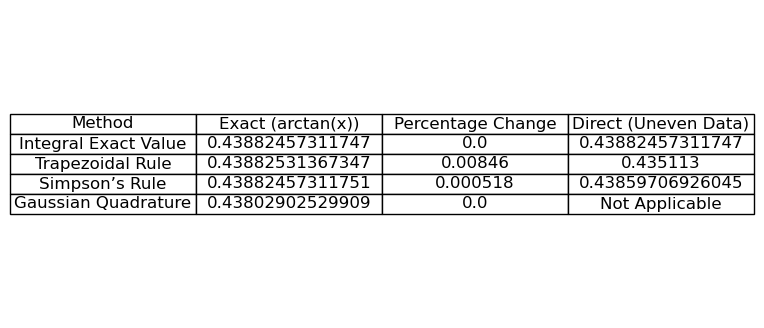

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Results data
data = {
    'Method': ['Integral Exact Value', 'Trapezoidal Rule', 'Simpson’s Rule', 'Gaussian Quadrature'],
    'Exact (arctan(x))': [0.43882457311747, 0.43882531367347, 0.43882457311751, 0.43802902529909],  # Exact value of integral of arctan(x) from 0 to 1
    'Percentage Change': [0, 0.00846, 0.000518, 0],
    'Direct (Uneven Data)': [0.43882457311747, 0.4351130000000, 0.43859706926045, 'Not Applicable']
}

# Create DataFrame
results_table = pd.DataFrame(data)

# Plotting the table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the size as needed
ax.axis('off')  # Hide the axes

# Plot the table
table = ax.table(cellText=results_table.values, colLabels=results_table.columns, loc='center', cellLoc='center')

# Style the table (optional)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Scale the table for better readability

# Display the plot
plt.show()